(2861, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB
None
                id          NH4         BSK5    Suspended           O2  \
count  2861.000000  2858.000000  2860.000000  2845.000000  2858.000000   
mean     12.397064     0.758734     4.316182    12.931905     9.508902   
std       6.084226     2.486247     2.973997    16.543097     4.428260 

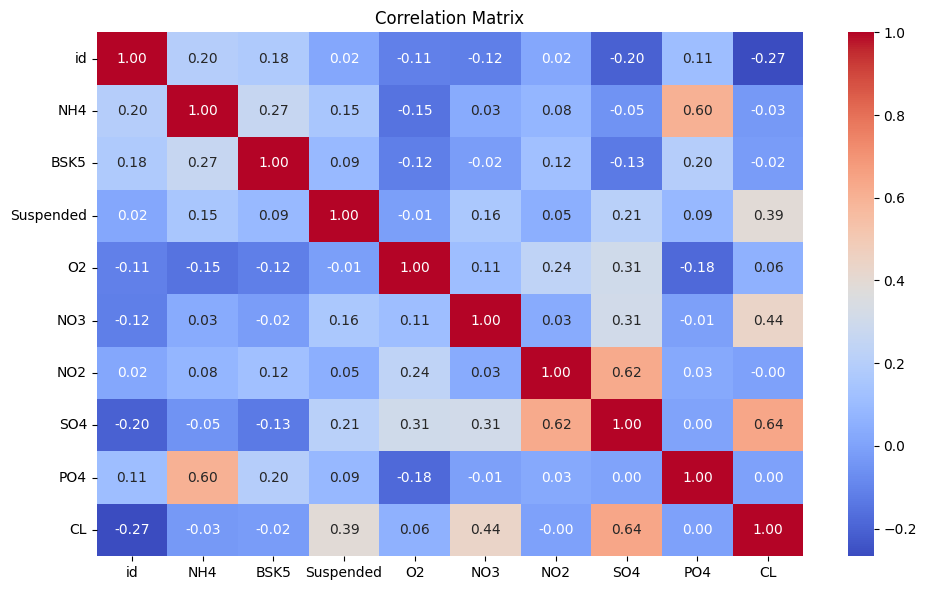

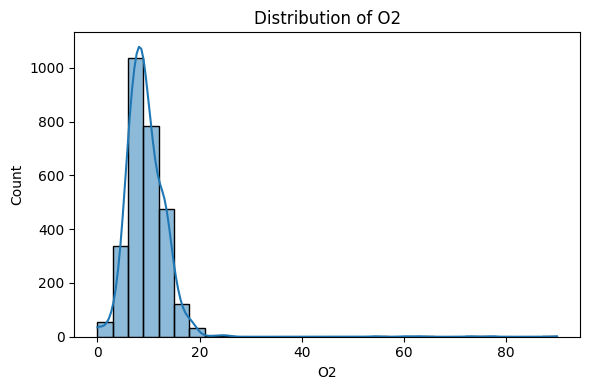

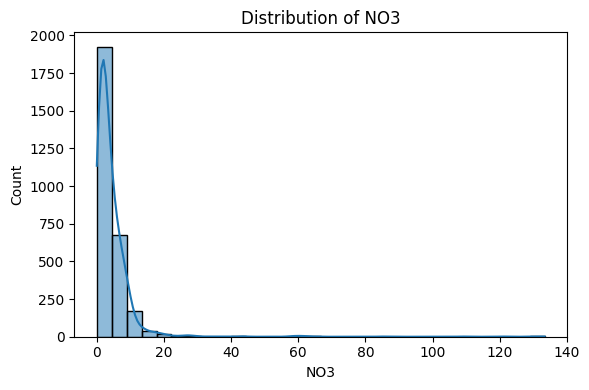

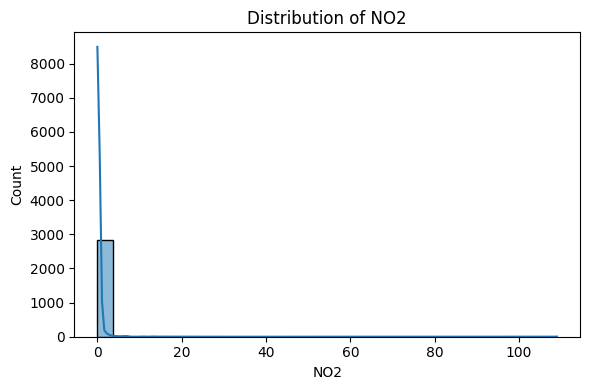

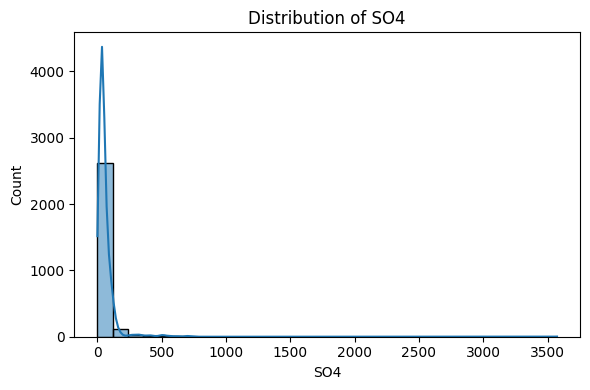

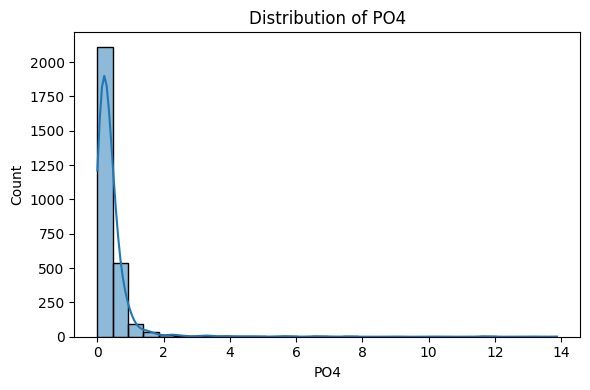

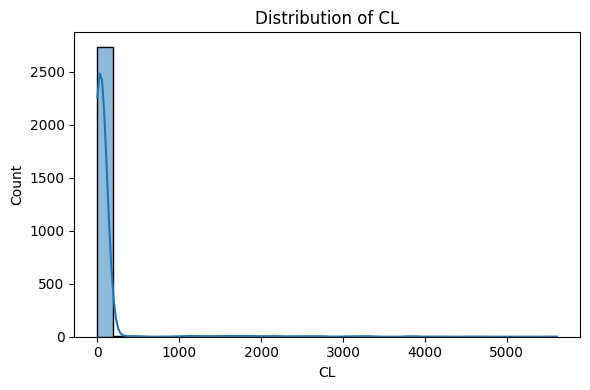

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r'C:\Users\91790\OneDrive\Documents\PB_All_2000_2021.csv' , sep=';')

# EDA
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
for col in pollutants:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Preprocessing
df.drop_duplicates(inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df = df.sort_values(by=['id', 'date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df = df[(z_scores < 3).all(axis=1)]

df.fillna(df.mean(), inplace=True)
df['id'] = df['id'].astype(str)

X = df.drop(columns=pollutants + ['date'])
y = df[pollutants]

X = pd.get_dummies(X, columns=['id'], drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)